In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [10]:
# Paths to dataset
train_path = "/kaggle/input/best-alzheimer-mri-dataset-99-accuracy/Combined Dataset/train"
validation_path = "/kaggle/input/best-alzheimer-mri-dataset-99-accuracy/Combined Dataset/test"

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os  # Import os for path validation

# Paths to dataset
train_path = "/kaggle/input/best-alzheimer-mri-dataset-99-accuracy/Combined Dataset/train"
validation_path = "/kaggle/input/best-alzheimer-mri-dataset-99-accuracy/Combined Dataset/test"

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load EfficientNetB0 with pre-trained weights
weights_path = '/kaggle/input/efficientttt-net-h5/efficientnetb0_notop.h5'
if os.path.exists(weights_path):
    print("Weights file found!")
else:
    print("Weights file missing!")
    
base_model = EfficientNetB0(include_top=False, weights=None, input_shape=(224, 224, 3))
base_model.load_weights(weights_path)

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Found 10240 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Weights file found!
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 1729s 5s/step - accuracy: 0.6728 - loss: 0.7148 - val_accuracy: 0.3486 - val_loss: 2.0558
Epoch 2/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4194 - val_loss: 1.8501
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1730s 5s/step - accuracy: 0.8139 - loss: 0.4155 - val_accuracy: 0.4984 - val_loss: 2.8303
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5484 - val_loss: 2.0766
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1702s 5s/step - accuracy: 0.8482 - loss: 0.3614 - val_accuracy: 0.7091 - val_loss: 0.6063
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6774 - val_loss: 0.5970
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1730s 5s/step - accuracy: 0.8884 - loss: 0.2763 - val_accuracy: 0.6875 - val_loss: 0.7363
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8710 - val_loss: 0.4369
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1728s 5s/step - accuracy: 0.9187 - lo

In [14]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
import numpy as np

# Predict on the validation set
validation_generator.reset()  # Ensure generator starts at the beginning
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes

# Compute metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# Print metrics
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall F1 Score: {f1:.4f}")

# Optional: Detailed classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(validation_generator.class_indices.keys())))


40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
Overall Accuracy: 0.3948
Overall Precision: 0.3914
Overall F1 Score: 0.3903

Classification Report:
                      precision    recall  f1-score   support

     Mild Impairment       0.15      0.10      0.12       179
 Moderate Impairment       0.00      0.00      0.00        12
       No Impairment       0.49      0.45      0.47       640
Very Mild Impairment       0.35      0.44      0.39       448

            accuracy                           0.39      1279
           macro avg       0.25      0.25      0.25      1279
        weighted avg       0.39      0.39      0.39      1279



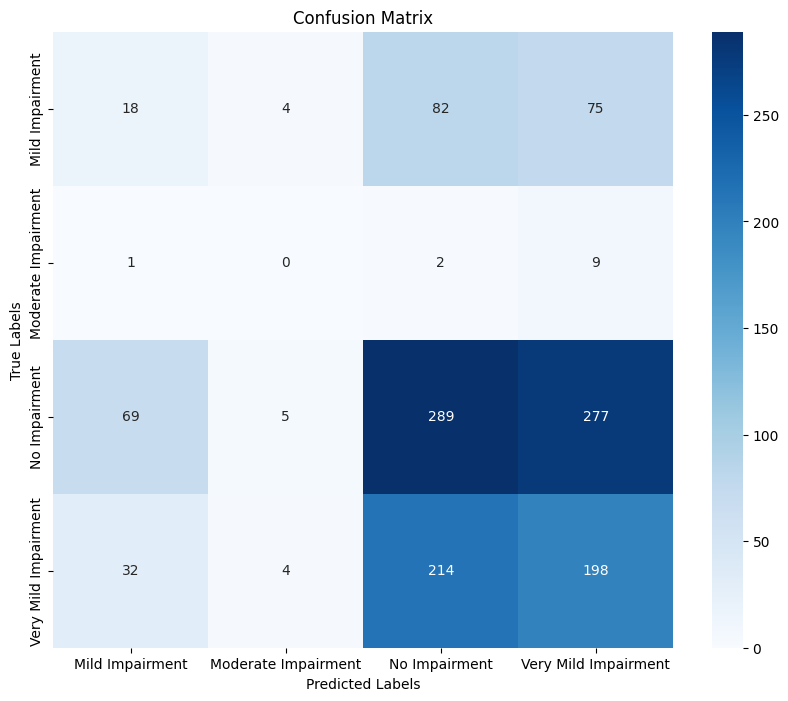

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=list(validation_generator.class_indices.keys()), 
            yticklabels=list(validation_generator.class_indices.keys()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
